In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/card_transdata.csv")

In [6]:
df.shape

(151208, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151208 entries, 0 to 151207
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              151208 non-null  float64
 1   distance_from_last_transaction  151207 non-null  float64
 2   ratio_to_median_purchase_price  151207 non-null  float64
 3   repeat_retailer                 151207 non-null  float64
 4   used_chip                       151207 non-null  float64
 5   used_pin_number                 151207 non-null  float64
 6   online_order                    151207 non-null  float64
 7   fraud                           151207 non-null  float64
dtypes: float64(8)
memory usage: 9.2 MB


In [8]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,151208.000000,151207.000000,151207.000000,151207.000000,151207.000000,151207.000000,151207.000000,151207.000000
mean,26.643735,5.003889,1.815999,0.881057,0.350328,0.102237,0.651451,0.086722
std,64.126233,23.792896,2.839988,0.323722,0.477074,0.302961,0.476512,0.281428
min,0.021322,0.000419,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.836266,0.293954,0.475497,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.935478,0.998659,0.995675,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.689921,3.344503,2.089351,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
missing_percent = (df.isnull().sum() / len(df)) * 100

In [11]:
missing_percent

,0
distance_from_home,0.000000
distance_from_last_transaction,0.000661
ratio_to_median_purchase_price,0.000661
repeat_retailer,0.000661
used_chip,0.000661
used_pin_number,0.000661
online_order,0.000661
fraud,0.000661


In [12]:
df = df.fillna(df.mean())

array([[<Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'distance_from_last_transaction'}>,
        <Axes: title={'center': 'ratio_to_median_purchase_price'}>],
       [<Axes: title={'center': 'repeat_retailer'}>,
        <Axes: title={'center': 'used_chip'}>,
        <Axes: title={'center': 'used_pin_number'}>],
       [<Axes: title={'center': 'online_order'}>,
        <Axes: title={'center': 'fraud'}>, <Axes: >]], dtype=object)

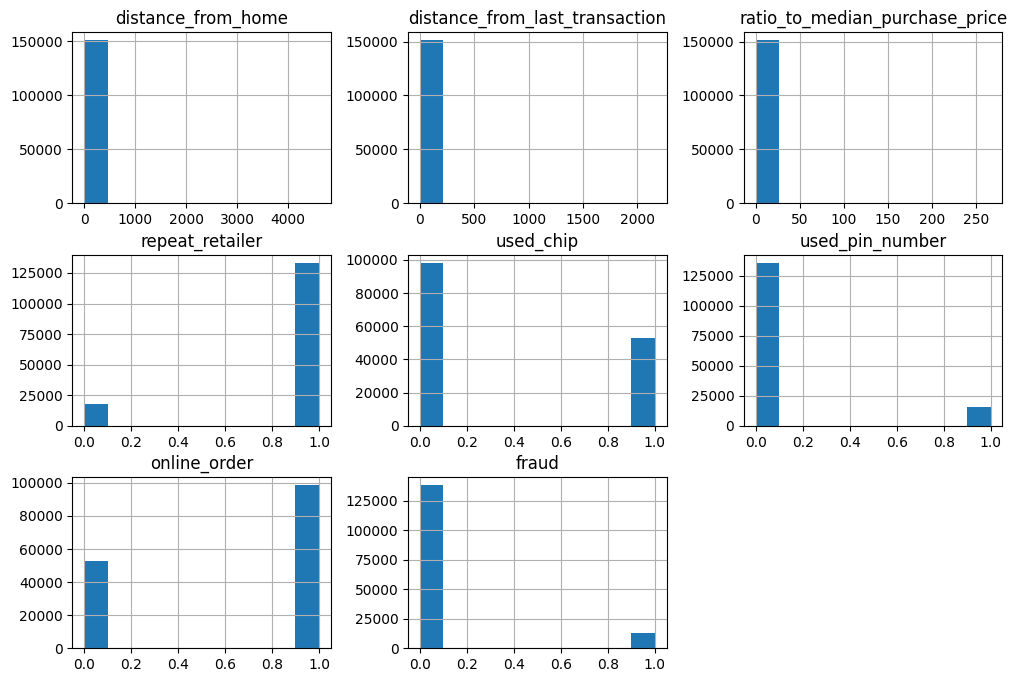

In [13]:
df.hist(figsize=(12,8))

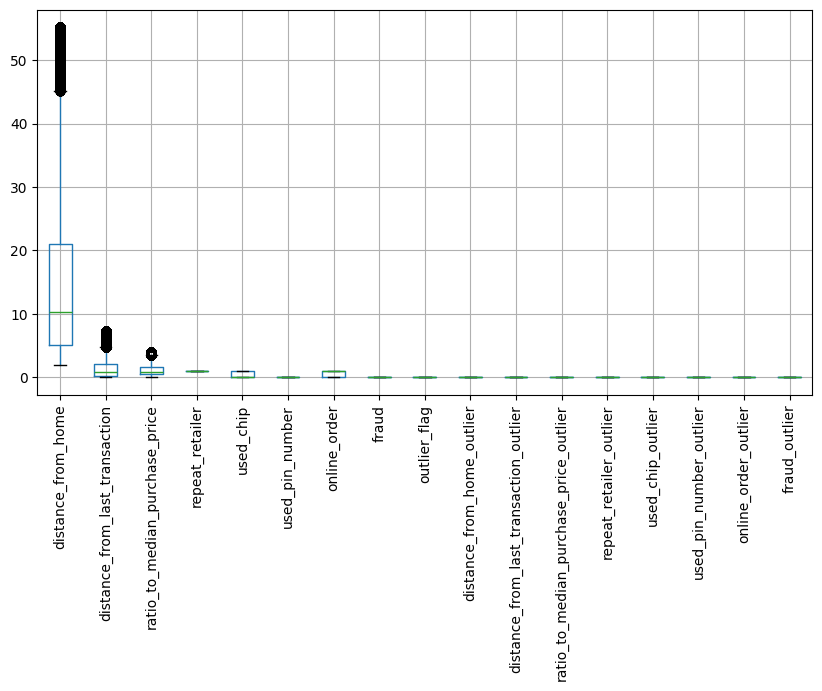

In [23]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [14]:
plt.show()

In [15]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (column < lower) | (column > upper)

In [16]:
df['outlier_flag'] = detect_outliers_iqr(df.select_dtypes(include=np.number).iloc[:,0])

In [17]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,outlier_flag
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False


In [18]:
for col in df.select_dtypes(include=np.number).columns:
    df[col + "_outlier"] = detect_outliers_iqr(df[col])

In [19]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

In [20]:
for col in df.select_dtypes(include=np.number).columns:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

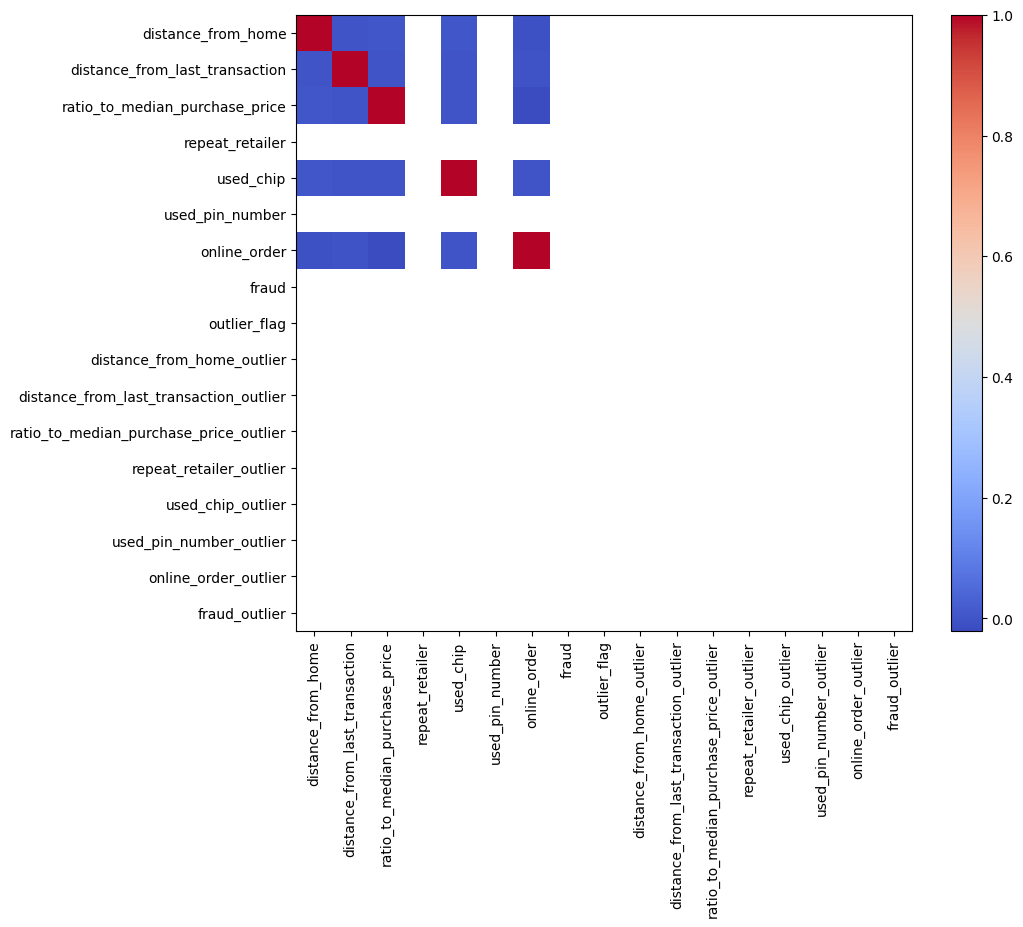

In [21]:
corr = df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

In [22]:
df.to_csv("cleaned_dataset.csv", index=False)